ЛАБОРАТОРНАЯ РАБОТА № 2 Выполнила Кичигина Кристина, группа РК6-61Б

Итак, мы имеем 4 параметра и 2 вида млекопитающих, которые входят в отношения "хищник-жертва". Вспомним, за что отвечают параметры: Альфа - коэффициент роста количества жертв, бетта - падение числа жертв, гамма - рост числа хищников, дельта - падение числа хищников. Определим критерий устойчивости. Нужно понимать, что слишком сильные колебания численности недопустимы т.к. при падении численности возможен выход в пик численности, из которого популяция будет выйти не в состоянии.Для того, чтобы соблюсти этот критерий установим меру в качестве отношения разности между максимальным и минимальным значениями к максимальному. Числитель при этом не должен превышать некоторой доли от знаменателя этой дроби. В то же время навряд ли в реальном мире численность популяции не претерпевает хотя бы малых колебаний. Поэтому целесообразно будет выбрать и соотношение, меньше которого наша дробь уходить недолжна.

Следует не забывать, что для ряда видов требуется некоторое минимальное число особей для гарантированного продолжения существования вида. Поэтому установим минимальные количества, делающие возможным существование вида дальше.

Таким образом, можно сформулировать следующий критерий устойчивости:

1. Соотношение разности максимального и минимального отношения к максимальному не должно превышать 1/4. Установим также и предельное соотношение в другой конец: соотношение разности максимального и минимального отношения к максимальному не менее 1/6.
2. Возьмем для хищников, к примеру, минимальную численность равной 2000. А для жертв - гораздо больше, порядка 50000, учитывая то, что этот вид млекопитающих не только сам должен продолжать существование и не вымирать, но и обеспечивать едой хищников.

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.optimize as scopt

In [24]:
#В классе Biome внесем некоторые правки по сравнению с начальным кодом класса. Изменим размер графиков
# и изменим вертикальную ось с линейной шкалы графика на логарифмическую.

class Biome(object):
    def __init__(self, pred_init, prey_init, tmax, dt=0.0001):
        self._dt = dt
        self._n_iters = int(tmax / dt)
        # Intial state
        self.pred_init = pred_init
        self.prey_init = prey_init
        # Data arrays
        self.time = None
        self.prey = None
        self.pred = None

    def run(self, alpha, beta, gamma, delta):
        """
        Simulation settings:
            alpha - prey growth
            beta - prey mortality
            delta - predator growrh
            gamma - predator mortality
        """
        self.time = np.zeros(self._n_iters)
        self.prey = np.zeros(self._n_iters)
        self.pred = np.zeros(self._n_iters)
        self.prey[0] = self.prey_init
        self.pred[0] = self.pred_init
        # Lotka-Volterra equations
        for i in range(self._n_iters - 1):
            self.prey[i + 1] = self.prey[i] + self._dt * self.prey[i] * (alpha - self.pred[i] * beta)
            self.pred[i + 1] = self.pred[i] + self._dt * self.pred[i] * (delta * self.prey[i] - gamma)
        self.time[1:] = np.add.accumulate([self._dt] * (self._n_iters - 1))
        return self.time, self.prey, self.pred

    def plot(self):
        plt.subplots(figsize=(10, 5))
        plt.xlabel('time')
        plt.ylabel('n')
        plt.semilogy(self.time, self.pred, label='predators', color='r')
        plt.semilogy(self.time, self.prey, label='preys', color='b')
        plt.legend()
        plt.grid()
        plt.show()

    def plot_cycle(self):
        plt.subplots(figsize=(5, 5))
        plt.xlabel('n predators')
        plt.ylabel('n preys')
        plt.plot(self.pred, self.prey, color='black')
        plt.grid()
        plt.show()

Требуется определить функции, которые будут соотносить количество жертв и количество хищников между собой. А также найти зависимость этих количеств от времени. В том числе для дальнейшего построения соответствующих графиков.

Начнем с того, как описана модель Вольтерра-Лотки в Википедии и будем использовать следующие уравнения в дальнейшем:

alpha * x – beta * x * y = dx / dt

-gamma * y + delta * x * y = dy / dt

Также в Википедии можно взять стационарное положение системы. Находится оно с помощью системы уравнений, в правой части которых стоят 0.

alpha * x – beta * x * y = 0

-gamma * y + delta * x * y = 0

Из несложных вычислений следует, что точка, относительно которой происходят колебания имеет
следующий вид:

x_st = gamma / delta

y_st = alpha / beta

Как было сказано ранее, очень важно получить так называемую фазовую функцию, то есть - зависимость между числом хищников и числом жертв, чтобы визуализировать это на графике. Заметим, что для этого нужно исключить фактор времени. Возьмем вышеприведенные уравнения и
в результате нехитрых операций получим фазовое уравнение:

(alpha * x – beta * x * y) / dx = (-gamma * y + delta * x * y) / dy

(-alpha * x + beta * x * y) * dy + (-gamma * y + delta * x * y) * dx = 0

Конечно, нам неудобно работать с таким представлением и поэтому проинтегрируем это,
предварительно подготовив систему, разделив уравнения на dx и dy соответственно и
приравняв их.Получим такое уравнение, которое смело можно назвать фазовым по нашей терминологии.

-alpha * ln(y) + beta * y - gamma * ln(x) + delta * x = Const

В правой части находится константа, не зависящая от x и y. Её можно получить, подставив в x0 и y0 - начальные условия из модели Лотки-Вольтерры.

Сделаем функцию из этого уравнения с помощью переноса всех членов в одну сторону

Func = -alpha * ln(y) + beta * y - gamma * ln(x) + delta * x - Const

Для нахождения пиковых значений переменных возьмем соответствующие частные производные:

dFunc / dx = -gamma / x + delta

dFunc / dy = -alpha / y + beta

Приравняв значения частных производных к нулю получаем, что экстремумы достигаются при следующих значениях x и y:

x_ex = gamma / delta

y_ex = alpha / beta

Отсюда мы получаем 2 уравнения:

-alpha * ln(y) + beta * y - gamma * ln(x_ex) + delta * x_ex = Const

-alpha * ln(y_ex) + beta * y_ex - gamma * ln(x) + delta * x = Const

-решения этих уравнений дают нам пиковые значения числа "хищников" и "жертв". В будущем эти уравнения будем называть характеристическими уравнениями.

In [ ]:
Вспомним уравнения стационарного положения:

x_st = gamma / delta

y_st = alpha / beta

Из этих уравнений очевидно, что можно нормализовать значения x и y, введя масштабный
коэффициент. При этом будем рассматривать x = 1 и y = 1. в качестве начальных условий.
И для нормализации разделим коэффициенты delta и beta. Это возможно, т.к. они не
оказывают влияние на частоту колебаний.
Тем самым находим решение проблемы масштабирования решения системы уравнения для
фазовых переменных.

delta_normalized = delta * prey_scale

beta_normalized = beta * predator_scale

Вдобавок можно уменьшить число параметров до 3-х, нормализовав фазовое
уравнение относительно одного из параметров, например, delta. После деления соответственно
delta нормализованный будет равен 1.

alpha_norm * ln(y) – beta_norm * y + gamma_norm * ln(x) - x = Const

-где:

alpha_norm = alpha / delta

beta_norm = beta / delta

gamma_norm = gamma / delta

delta_norm = 1

Это возможно т.к. в нашей задаче нам важно не столько значение параметров,
сколько соотношение между ними. Так можно уменьшить число оптимизируемых параметров.


In [35]:
#Максимальное значение отношения разности максимального и минимального значений к максимальному
max_prop = 1 / 4
#Минимальное значение отношения разности максимального и минимального значений к максимальному
min_prop = 1 / 6
#Среднее между максимальным и минимальным отношениями
middle_prop = (max_prop + min_prop) / 2
#Масштабный коэффициент "жертв"
prey_scale = 70000
#Масштабный коэффициент "хищников"
pred_scale = 2400
#Минимальное абсолютное количество "жертв"
prey_min = 50000
#Минимальное авсолютное количество "хищников"
pred_min = 2000

x0 = 1
y0 = 1

def fx(x, args_x):
    return(args_x[3]*abs(x) + args_x[1]*args_x[4] - args_x[2]*math.log(abs(x)) - args_x[0]*math.log(args_x[4]) - args_x[5])

def fy(y, args_y):
    return(args_y[3]*args_y[4] + args_y[1]*abs(y) - args_y[2]*math.log(args_y[4]) - args_y[0]*math.log(abs(y)) - args_y[5])

def solut(parameter):
    alpha = abs(parameter[0])
    beta  = abs(parameter[1])
    gamma = abs(parameter[2])
    delta = 1
    Const = delta * x0 + beta * y0 - gamma * math.log(x0) - alpha * math.log(y0)
    x_foc = gamma / delta
    y_foc = alpha / beta

    args_x = [alpha, beta, gamma, delta, y_foc, Const]
    args_y = [alpha, beta, gamma, delta, x_foc, Const]
    
#     # Проверяем допустимые состояния
#     a = alpha
#     b = delta * x_foc - gamma * math.log(x_foc) - Const
#     k = beta
#     if (a + b > a * math.log(a / k)):
#         return 10000
    y1 = scopt.fsolve(fy, 0.001, args_y)
    y2 = scopt.fsolve(fy, 2 * y_foc, args_y)
    
#     #Проверяем допустимые состояния
#     a = gamma
#     b = beta * y_foc - alpha * math.log(y_foc) - Const
#     k = delta
#     if (a + b > a * math.log(a / k)):
#         return 10000
    x1 = scopt.fsolve(fx, 0.001, args_x)
    x2 = scopt.fsolve(fx, 2 * x_foc, args_x)
    
    #Проверяем условие минимальной численности
    if (prey_scale * x1 < prey_min or prey_scale * x2 < prey_min):
        return 10000
    if (pred_scale * y1 < pred_min or pred_scale * y2 < pred_min):
        return 10000

    prop = max(abs(x2 - x1) / max(abs(x1), abs(x2)), abs(y2 - y1) / max(abs(y1), abs(y2)))
    return(abs(prop - middle_prop))

result = scopt.minimize(solut, [1.2, 1, 1])
alpha = abs(result.x[0])
beta  = abs(result.x[1])
gamma = abs(result.x[2])
delta = 1
print("alpha = {}".format(alpha))
print("beta  = {}".format(beta))
print("gamma = {}".format(gamma))
print("delta = {}".format(delta))

alpha = 1.1625920481886427
beta  = 1.0410351414279273
gamma = 1.003854398057885
delta = 1


Среднее число хищников = 2680.2370108520627
Среднее  число  жертв  = 70269.80786405194


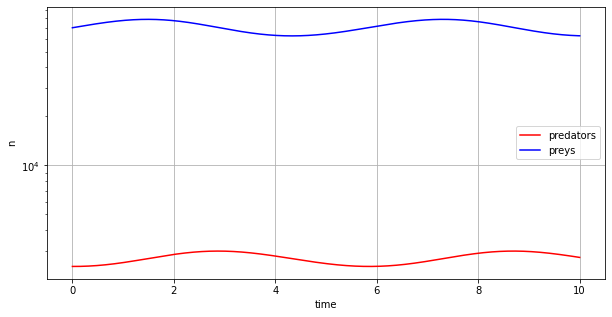

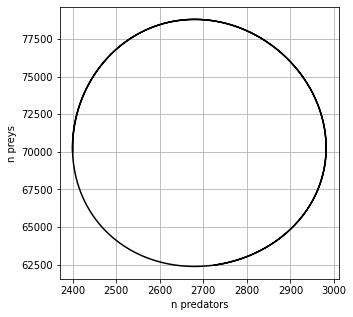

In [36]:
print("Среднее число хищников = {}".format(pred_scale * (alpha / beta)))
print("Среднее  число  жертв  = {}".format(prey_scale * (gamma / delta)))
biome = Biome(pred_init = y0 * pred_scale, prey_init = x0 * prey_scale, tmax = 10)
biome.run(alpha, beta / pred_scale, gamma, delta / (prey_scale))
biome.plot()
biome.plot_cycle()

In [37]:
C = delta * x0 + beta * y0 - gamma * math.log(x0) - alpha * math.log(y0)
x_foc = gamma / delta
y_foc = alpha / beta
   
args_x = [alpha, beta, gamma, delta, y_foc, C]
args_y = [alpha, beta, gamma, delta, x_foc, C]

y1 = scopt.fsolve(fy, 0.001, args_y)
y2 = scopt.fsolve(fy, 2 * y_foc, args_y)

x1 = scopt.fsolve(fx, 0.001, args_x)
x2 = scopt.fsolve(fx, 2 * x_foc, args_x)
    
print("Отношение разности максимального и минимального числа к максимальному для хищников:")
print(abs(y2 - y1) / max(abs(y1), abs(y2)))
print("Отношение разности максимального и минимального числа к максимальному для жертв:")
print(abs(x2 - x1) / max(abs(x1), abs(x2)))
print("Минимальное число хищников:")
print(min(y1, y2) * pred_scale)
print("Минимальное число жертв:")
print(min(x1, x2) * prey_scale)
print("Значение коэффициентов с учетом масштаба:")
print("alpha = {}".format(alpha))
print("beta  = {}".format(beta / pred_scale))
print("gamma = {}".format(gamma))
print("delta = {}".format(delta / prey_scale))
print("Соотношение гибели жертв к рождаемости хищников:")
print((beta / pred_scale)/(delta / prey_scale))

Отношение разности максимального и минимального числа к максимальному для хищников:
[0.19512632]
Отношение разности максимального и минимального числа к максимальному для жертв:
[0.20833333]
Минимальное число хищников:
[2399.85356976]
Минимальное число жертв:
[62381.06874838]
Значение коэффициентов с учетом масштаба:
alpha = 1.1625920481886427
beta  = 0.0004337646422616364
gamma = 1.003854398057885
delta = 1.4285714285714285e-05
Соотношение гибели жертв к рождаемости хищников:
30.36352495831455


Ранее было принято, что численность меньше определенной является недопустимой. Поэтому в данном случае видно действие критерия минимальной численности. Однако соотношение гибели жертв к рождаемости хищников не правдоподобно и требует изменения. Допустим, что на одного нового хищника нужно 25 зайцев, тогда чтобы родился 1 хищник гибель жертвы будет составлять минимум 25, а то и больше в силу смертей и от других животных(ведь мы рассматриваем хоть и два вида, но жертв есть могут не только конкретно эти хищники), также не все жертвы идут на пищу хищнику, некоторые умирают сами. Стоит изменить параметр альфа. Тогда Бета изменится пропорционально ему. Допустим альфа увеличится в 6 раз, тогда и бета увеличим в 6 раз.

Среднее число хищников = 2680.2370108520627
Среднее  число  жертв  = 70269.80786405194


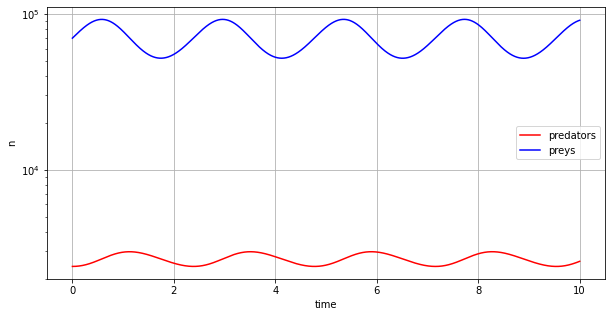

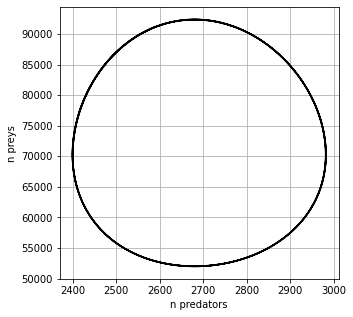

In [44]:
alpha2 = 6 * alpha
beta2 = 6 * beta

print("Среднее число хищников = {}".format(pred_scale * (alpha / beta)))
print("Среднее  число  жертв  = {}".format(prey_scale * (gamma / delta)))
biome = Biome(pred_init = y0 * pred_scale, prey_init = x0 * prey_scale, tmax = 10)
biome.run(alpha2, beta2 / pred_scale, gamma, delta / (prey_scale))
biome.plot()
biome.plot_cycle()

In [45]:
C = delta * x0 + beta2 * y0 - gamma * math.log(x0) - alpha2 * math.log(y0)
x_foc = gamma / delta
y_foc = alpha2 / beta2
   
args_x = [alpha2, beta2, gamma, delta, y_foc, C]
args_y = [alpha2, beta2, gamma, delta, x_foc, C]

y1 = scopt.fsolve(fy, 0.001, args_y)
y2 = scopt.fsolve(fy, 2 * y_foc, args_y)

x1 = scopt.fsolve(fx, 0.001, args_x)
x2 = scopt.fsolve(fx, 2 * x_foc, args_x)
    
print("Отношение разности максимального и минимального числа к максимальному для хищников:")
print(abs(y2 - y1) / max(abs(y1), abs(y2)))
print("Отношение разности максимального и минимального числа к максимальному для жертв:")
print(abs(x2 - x1) / max(abs(x1), abs(x2)))
print("Минимальное число хищников:")
print(min(y1, y2) * pred_scale)
print("Минимальное число жертв:")
print(min(x1, x2) * prey_scale)
print("Значение коэффициентов с учетом масштаба:")
print("alpha = {}".format(alpha2))
print("beta  = {}".format(beta2 / pred_scale))
print("gamma = {}".format(gamma))
print("delta = {}".format(delta / prey_scale))
print("Соотношение гибели жертв к рождаемости хищников:")
print((beta2 / pred_scale)/(delta / prey_scale))

Отношение разности максимального и минимального числа к максимальному для хищников:
[0.19504733]
Отношение разности максимального и минимального числа к максимальному для жертв:
[0.43620297]
Минимальное число хищников:
[2399.97558903]
Минимальное число жертв:
[52047.96557555]
Значение коэффициентов с учетом масштаба:
alpha = 6.975552289131857
beta  = 0.0026025878535698185
gamma = 1.003854398057885
delta = 1.4285714285714285e-05
Соотношение гибели жертв к рождаемости хищников:
182.1811497498873


Видим, что минимальные числа для хищников и жертв соблюдаются. И соотношение гибели жертв к рождаемости стало более приемлемым в силу большей правдоподобности.

Поэкспериментируем с амплитудами колебаний. Для этого увеличим параметры альфа и бета.

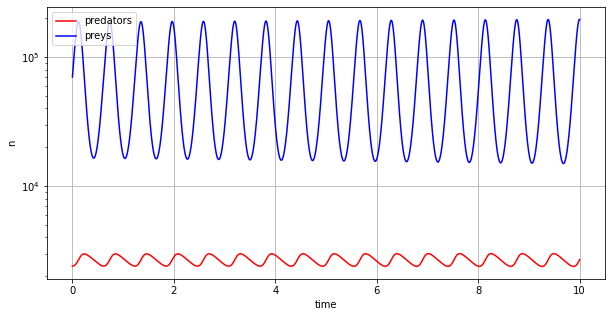

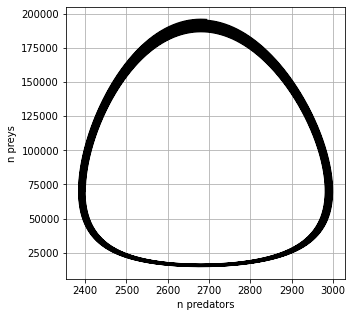

In [46]:
biome = Biome(pred_init = y0 * pred_scale, prey_init = x0 * prey_scale, tmax = 10)
biome.run(100 * alpha, 100 * beta / pred_scale, gamma, delta / prey_scale)
biome.plot()
biome.plot_cycle()

Дополнительное задание: предложить методику оценки значимости параметров модели для выбранного критерия.
Моделируя конкретный реальный биом и зная его особенности, можно предложить примерные границы коэффициентов альфа, бета, гамма и дельта. Тем самым мы будем учитывать реальные особенности рассмтриваемого бинома и сразу же икслючать коэффициенты неподходящие нашему биному.Однако нам не столько важно наблюдение самих коэффициентов, сколько утсановление зависимости в виде их соотношения. Стоит заметить, что симметричность графиков относительно оси количества и лучшая минимизация достигается при следующем соотношении:

Alpha/Beta = Gamma/Delta

Можем осуществить соблюдение этого равенства простым перебором параметров.

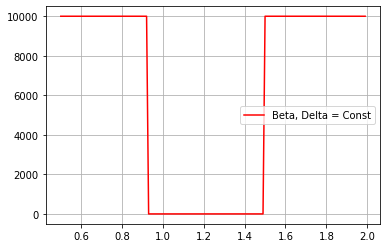

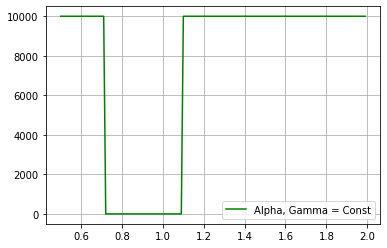

In [48]:
X = []
Y = []

for a in range(50, 200):
    X.append(a/100)
    par = [a/100, 1, a/100, 1]
    Y.append(solut(par))
    
plt.plot(X, Y, label="Beta, Delta = Const", color='r')
plt.legend()
plt.grid()
plt.show()

X.clear()
Y.clear()

for b in range(50, 200):
    X.append(b/100)
    par = [1, b/100, 1, b/100]
    Y.append(solut(par))
    
plt.plot(X, Y, label="Alpha, Gamma = Const", color='g')
plt.legend()
plt.grid()
plt.show()